# Clase 1 : Conociendo nuestros datos de pinguinos

## Importar librerias

In [1]:
import empiricaldist
import janitor
import matplotlib.pyplot as plt
import numpy as np
import palmerpenguins
import pandas as pd
import scipy.stats
import seaborn as sns
import sklearn.metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as ss
import session_info

C:\Users\ANDRES\AppData\Roaming\Python\Python312\site-packages\janitor\utils.py:84: FutureWarning: PandasArray has been renamed NumpyExtensionArray. Use that instead. This alias will be removed in a future version.
  @_expand_grid.register(pd.arrays.PandasArray)


## Establecer apariencias general de los gráficos

In [2]:
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (11, 9.4)

penguin_color = {
    'Adelie': '#ff6602ff',
    'Gentoo': '#0f7175ff',
    'Chinstrap': '#c65dc9ff'
}

## Cargar los datos

### Utilizando el paquete palmerpenguins

#### Datos crudos

In [3]:
raw_penguins_df = palmerpenguins.load_penguins_raw()
raw_penguins_df

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,2007-11-11,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,2007-11-11,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,2007-11-16,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,2007-11-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,2007-11-16,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,PAL0910,64,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N98A2,Yes,2009-11-19,55.8,19.8,207.0,4000.0,MALE,9.70465,-24.53494,NaN
340,PAL0910,65,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N99A1,No,2009-11-21,43.5,18.1,202.0,3400.0,FEMALE,9.37608,-24.40753,Nest never observed with full clutch.
341,PAL0910,66,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N99A2,No,2009-11-21,49.6,18.2,193.0,3775.0,MALE,9.46180,-24.70615,Nest never observed with full clutch.
342,PAL0910,67,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N100A1,Yes,2009-11-21,50.8,19.0,210.0,4100.0,MALE,9.98044,-24.68741,NaN


#### Datos Previamente Procesados

In [4]:
preprocess_penguins_df = palmerpenguins.load_penguins()
preprocess_penguins_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


#### Utilizando los conjuntos de datos de seaborn

In [5]:
sns.load_dataset('penguins')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


#### Datos descargados

In [6]:
preprocess_penguins_df = pd.read_csv(r'C:\Users\ANDRES\Cursos\Curso Análisis Exploratorio de datos\penguins.csv',delimiter=',')
preprocess_penguins_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


# Colecta y calidación 

## ¿Qué tipo de dato son las variables del conjunto de datos?

In [7]:
preprocess_penguins_df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object

## ¿Cuántas cariables de cada tipo de adto tenemos en conjunto de datos?

In [8]:
(
    preprocess_penguins_df
    .dtypes
    .value_counts()
)

float64    4
object     3
int64      1
Name: count, dtype: int64

## ¿Cuántas variables y observaciones tenemos en conjunto de datos?

In [9]:
preprocess_penguins_df.shape

(344, 8)

## ¿Existen valores nulos explícitos en el conjunto de datos?

In [10]:
(
    preprocess_penguins_df
    .isnull()
    .any()
)

species              False
island               False
bill_length_mm        True
bill_depth_mm         True
flipper_length_mm     True
body_mass_g           True
sex                   True
year                 False
dtype: bool

## De tener observaciones con valores nulos, ¿Cuántas tenemos por cada varible?

In [11]:
(
    preprocess_penguins_df
    .isnull()
    .sum()
)

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

## ¿Cuántos valores nulos tenemos en total en el conjunto de datos?

In [12]:
(
    preprocess_penguins_df
    .isnull()
    .sum()
    .sum()
)

np.int64(19)

## ¿Cuál es la proporción de valores nulos por cada variable?

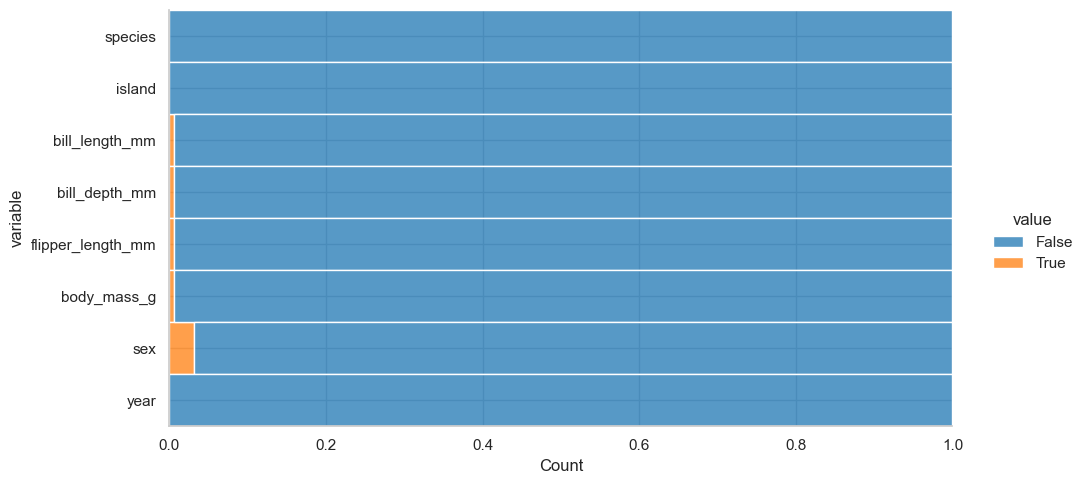

In [13]:
(
    preprocess_penguins_df
    .isnull()
    .melt()
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                y='variable',
                hue='value',
                multiple='fill',
                aspect=2
            )
        )
    )
)

## ¿Cómo podemos visualizar los valores nulos en todo el conjunto de datos?

<Axes: >

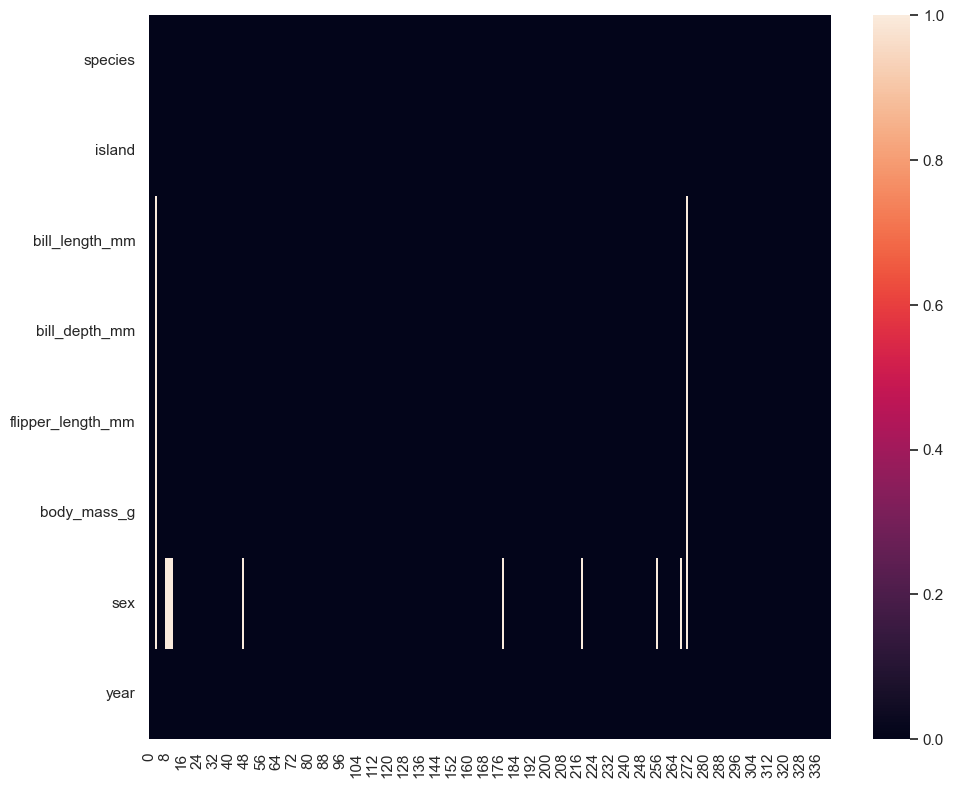

In [14]:
(
    preprocess_penguins_df
    .isnull()
    .transpose()
    .pipe(
        lambda df: (
            sns.heatmap(
                data=df
                       )
                   )
    )
)

## ¿Cuántas observaciones perdemos si eliminamos los datos faltantes?

In [15]:
preprocess_penguins_df.shape

(344, 8)

In [16]:
processed_penguins_df = (
    preprocess_penguins_df
    .dropna()
)
preprocess_penguins_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


# Conteos y proporciones

## Preludio: ¿Qué estadísticos describen el conjunto de datos?

### Todas las variables

In [17]:
processed_penguins_df.describe(include='all') 

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
count,333,333,333.000000,333.000000,333.000000,333.000000,333,333.000000
unique,3,3,NaN,NaN,NaN,NaN,2,NaN
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,male,NaN
freq,146,163,NaN,NaN,NaN,NaN,168,NaN
mean,NaN,NaN,43.992793,17.164865,200.966967,4207.057057,NaN,2008.042042
std,NaN,NaN,5.468668,1.969235,14.015765,805.215802,NaN,0.812944
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN,2007.000000
25%,NaN,NaN,39.500000,15.600000,190.000000,3550.000000,NaN,2007.000000
50%,NaN,NaN,44.500000,17.300000,197.000000,4050.000000,NaN,2008.000000
75%,NaN,NaN,48.600000,18.700000,213.000000,4775.000000,NaN,2009.000000


### Solo las numéricas

In [18]:
processed_penguins_df.describe(include=[np.number])

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,333.000000,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057,2008.042042
std,5.468668,1.969235,14.015765,805.215802,0.812944
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.500000,15.600000,190.000000,3550.000000,2007.000000
50%,44.500000,17.300000,197.000000,4050.000000,2008.000000
75%,48.600000,18.700000,213.000000,4775.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


### Solo categóricas - 1

In [19]:
processed_penguins_df.describe(include=object) # object puede tener un espectro muy amplio de columnas

,species,island,sex
count,333,333,333
unique,3,3,2
top,Adelie,Biscoe,male
freq,146,163,168


### Solo categóricas - 2

In [20]:
(
    preprocess_penguins_df
    .astype({ # Guardar el tipo de dato con categoria ayuda a tener mayor control de la información
        'species': 'category', 
        'island': 'category',
        'sex': 'category'
    })
)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [21]:
(
    preprocess_penguins_df
    .astype({
        'species': 'category',
        'island': 'category',
        'sex': 'category'
    })
    .describe(include='category')
)

,species,island,sex
count,344,344,333
unique,3,3,2
top,Adelie,Biscoe,male
freq,152,168,168


## ¿Cómo visualizar los conteos?

### Pandas

<Axes: xlabel='species'>

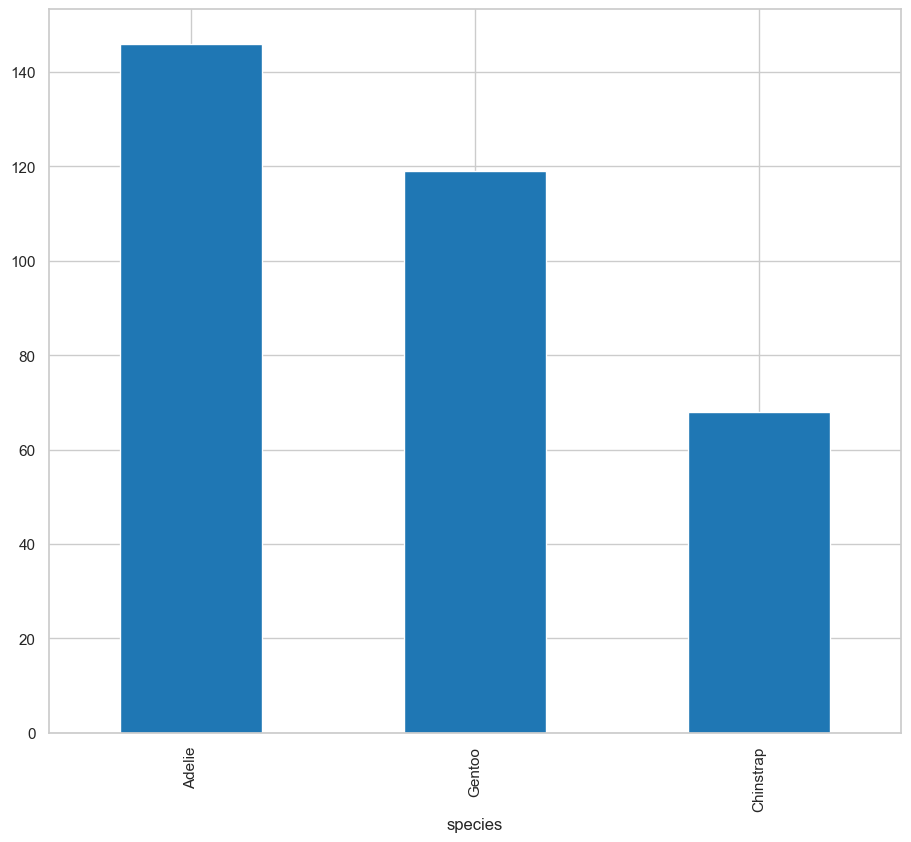

In [22]:
(
    processed_penguins_df
    .species
    .value_counts()
    .plot(
        kind='bar'
    )
)

### Seaborn

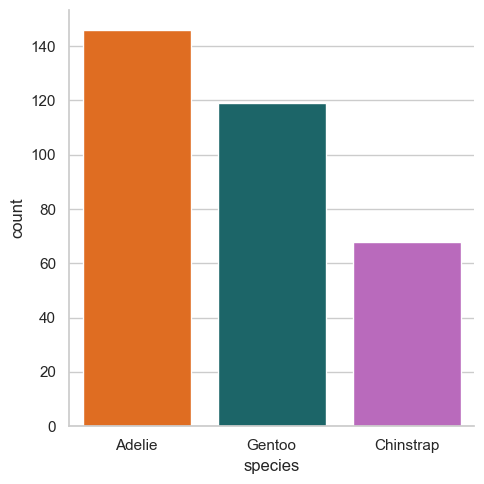

In [23]:
sns.catplot(
    data = processed_penguins_df,
    x = 'species',
    kind = 'count',
    hue='species',
    palette=penguin_color
)

<Axes: xlabel='species', ylabel='count'>

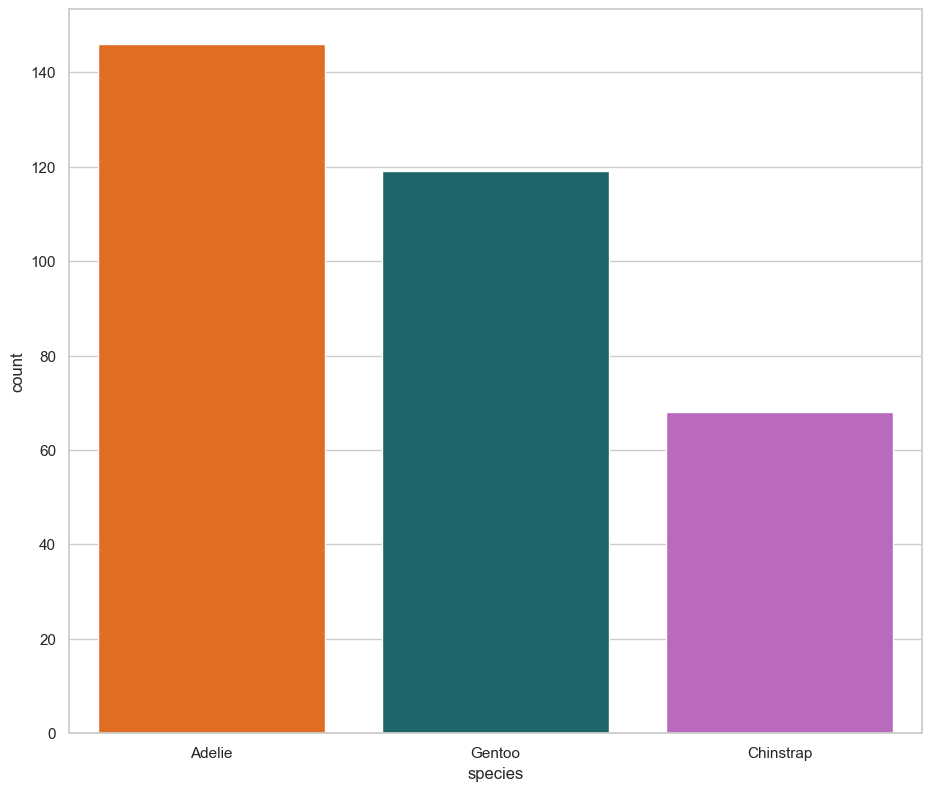

In [24]:
(
    processed_penguins_df
    .value_counts('species', sort=True)
    .reset_index(name='count')
    .pipe(
        lambda df: (
            sns.barplot(
                data=df,
                x='species',
                y='count',
                hue='species',
                palette=penguin_color
            )
            
        ) 
    )
)

### ¿Cómo visualizar las proporciones?

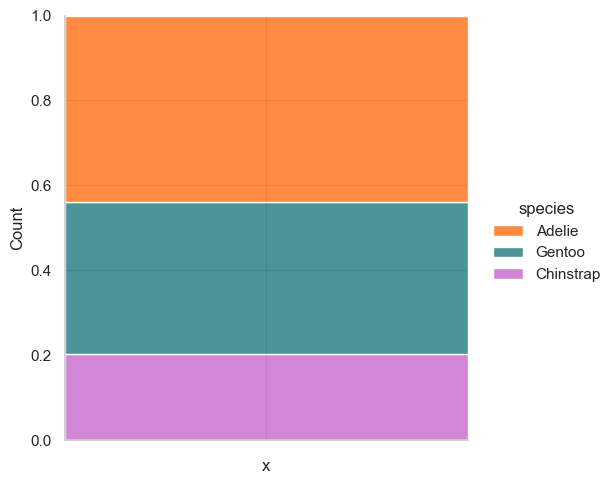

In [25]:
(
    processed_penguins_df
    .add_column('x', '')
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                x='x',
                hue='species',
                multiple='fill',
                palette=penguin_color
            )
        )
    )
    
)

# Medidas de tendencia central

## Media o promedio

In [26]:
processed_penguins_df.bill_depth_mm.mean()

np.float64(17.164864864864867)

In [27]:
np.mean(processed_penguins_df.bill_depth_mm)

np.float64(17.164864864864867)

In [28]:
processed_penguins_df.mean(numeric_only='True')

bill_length_mm         43.992793
bill_depth_mm          17.164865
flipper_length_mm     200.966967
body_mass_g          4207.057057
year                 2008.042042
dtype: float64

## Mediana

In [29]:
processed_penguins_df.median(numeric_only='True')

bill_length_mm         44.5
bill_depth_mm          17.3
flipper_length_mm     197.0
body_mass_g          4050.0
year                 2008.0
dtype: float64

## Moda

In [30]:
processed_penguins_df.mode()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Biscoe,41.1,17.0,190.0,3800.0,male,2009


In [31]:
processed_penguins_df.describe(include='object')

,species,island,sex
count,333,333,333
unique,3,3,2
top,Adelie,Biscoe,male
freq,146,163,168


#  Medidas de dispersión

## ¿Cuál es el valor máximo de las variables?

In [32]:
processed_penguins_df.max(numeric_only='True')

bill_length_mm         59.6
bill_depth_mm          21.5
flipper_length_mm     231.0
body_mass_g          6300.0
year                 2009.0
dtype: float64

## ¿Cuál es el valor máximo de las variables?

In [33]:
processed_penguins_df.min(numeric_only='True')

bill_length_mm         32.1
bill_depth_mm          13.1
flipper_length_mm     172.0
body_mass_g          2700.0
year                 2007.0
dtype: float64

## ¿Cuál es el rango de las variables?

In [34]:
processed_penguins_df.max(numeric_only='True') - processed_penguins_df.min(numeric_only='True')

bill_length_mm         27.5
bill_depth_mm           8.4
flipper_length_mm      59.0
body_mass_g          3600.0
year                    2.0
dtype: float64

## ¿Cuál es la desviación estándar de las variables?

In [35]:
processed_penguins_df.std(numeric_only='True')

bill_length_mm         5.468668
bill_depth_mm          1.969235
flipper_length_mm     14.015765
body_mass_g          805.215802
year                   0.812944
dtype: float64

In [36]:
processed_penguins_df.mean(numeric_only='True') - processed_penguins_df.std(numeric_only='True')

bill_length_mm         38.524124
bill_depth_mm          15.195629
flipper_length_mm     186.951202
body_mass_g          3401.841255
year                 2007.229098
dtype: float64

## ¿Cuál es el rango intercuartílico?

In [37]:
processed_penguins_df.quantile(numeric_only='True', q=0.75)

bill_length_mm         48.6
bill_depth_mm          18.7
flipper_length_mm     213.0
body_mass_g          4775.0
year                 2009.0
Name: 0.75, dtype: float64

In [38]:
processed_penguins_df.quantile(numeric_only='True', q=0.25)

bill_length_mm         39.5
bill_depth_mm          15.6
flipper_length_mm     190.0
body_mass_g          3550.0
year                 2007.0
Name: 0.25, dtype: float64

In [39]:
processed_penguins_df.quantile(numeric_only='True', q=0.75) - processed_penguins_df.quantile(numeric_only='True', q=0.25)

bill_length_mm          9.1
bill_depth_mm           3.1
flipper_length_mm      23.0
body_mass_g          1225.0
year                    2.0
dtype: float64

In [40]:
(
    processed_penguins_df
    .quantile(numeric_only='True',q=[0.75, 0.5, 0.25])
    .transpose()
    .rename_axis('variable')
    .reset_index()
    .assign(
            iq=lambda df: df[0.75] - df[0.25])
)

,variable,0.75,0.5,0.25,iq
0,bill_length_mm,48.6,44.5,39.5,9.1
1,bill_depth_mm,18.7,17.3,15.6,3.1
2,flipper_length_mm,213.0,197.0,190.0,23.0
3,body_mass_g,4775.0,4050.0,3550.0,1225.0
4,year,2009.0,2008.0,2007.0,2.0


## ¿Cómo puedo visualizar la distribución de una variable?

### Histograma

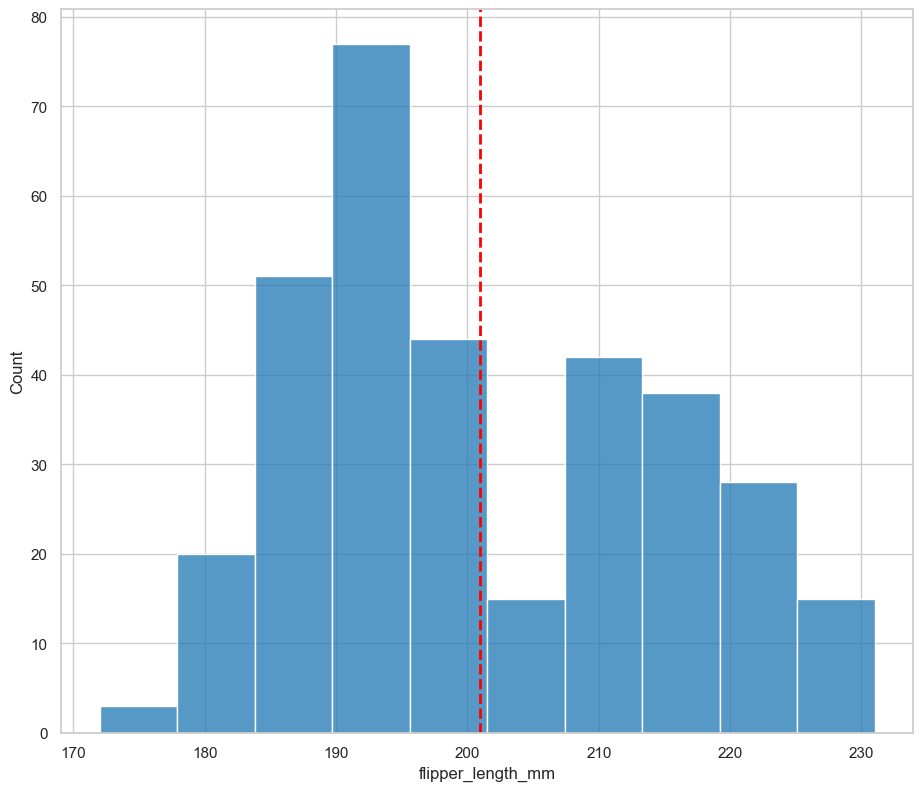

In [48]:
sns.histplot(
    data=processed_penguins_df,
    x='flipper_length_mm'
)

plt.axvline(
    x=processed_penguins_df.flipper_length_mm.mean(),
    color='red',
    linestyle='dashed',
    linewidth=2
)

### Diagrama de caja / boxplot

<Axes: xlabel='flipper_length_mm'>

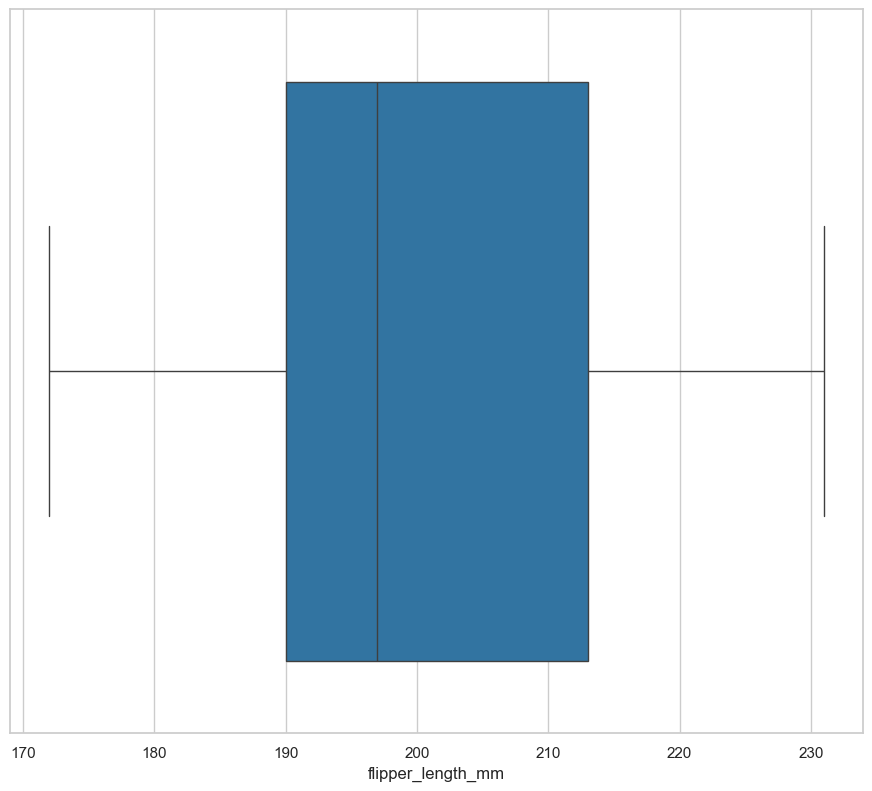

In [45]:
sns.boxplot(
    data=processed_penguins_df,
    x='flipper_length_mm'
)

## Limitaciones

In [50]:
def freedman_daiconis_binwidth(x: pd.Series) -> float:
    """Find optimal binwidth using Freedman-Diaconis rule"""

    IQR =  x.quantile(0.75) - x.quantile(0.25)
    N = x.size

    return 2 * IQR / N ** (1/3)

    

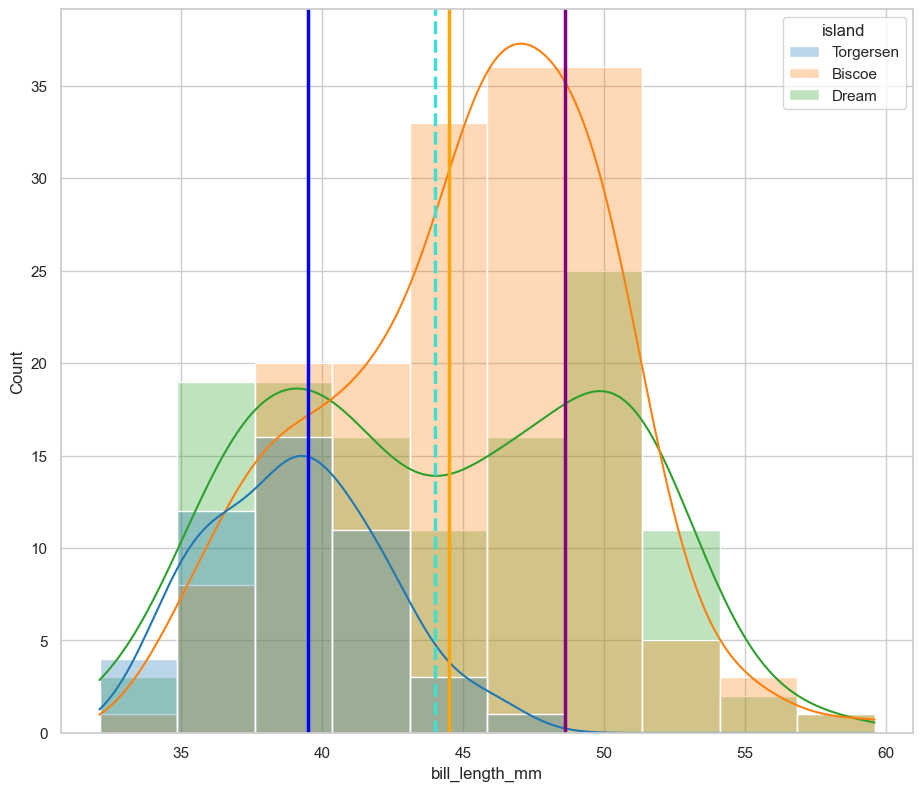

In [71]:
sns.histplot(
    data=processed_penguins_df,
    hue='island',
    x='bill_length_mm',
    binwidth=freedman_daiconis_binwidth(processed_penguins_df.bill_length_mm),
    kde='True',
    alpha=0.3
)

plt.axvline(
    x=processed_penguins_df.bill_length_mm.mean(),
    color='turquoise',
    linestyle='--',
    linewidth=2.5,
    label='media'
)

plt.axvline(
    x=processed_penguins_df.bill_length_mm.median(),
    color='orange',
    linestyle='-',
    linewidth=2.5,
    label='mediana'
)

plt.axvline(
    x=processed_penguins_df.bill_length_mm.quantile(0.25),
    color='blue',
    linestyle='-',
    linewidth=2.5,
    label='q1'
)

plt.axvline(
    x=processed_penguins_df.bill_length_mm.quantile(0.75),
    color='purple',
    linestyle='-',
    linewidth=2.5,
    label='q3'
)


#